In [9]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [10]:
#Loading the dataset
Bike_sharing_df = pd.read_csv("/content/Group_8_clean_data.csv")

In [11]:
#Printing the column names
for i in Bike_sharing_df.columns:
  print(i)

Unnamed: 0
season
year
month
hour
holiday
weekday
workingday
weathersit
temp
atemp
humidity
windspeed
casual
registered
Count
total riders


In [12]:
# Printing theh first five instances from dataset
Bike_sharing_df.head()

,Unnamed: 0,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count,total riders
0,0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0,3,13,16,16
1,1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0,8,32,40,40
2,2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0,5,27,32,32
3,3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0,3,10,13,13
4,4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [13]:
Bike_sharing_df.describe()

,Unnamed: 0,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count,total riders
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,8688.742476,2011.502561,11.547505,0.028774,1.425332,0.496993,0.475780,0.627216,0.190108,35.680267,153.803649,189.483916,189.483916
std,5017.170830,0.500008,6.914438,0.167175,0.639377,0.192553,0.171849,0.192935,0.122343,49.306423,151.357913,181.387645,181.387645
min,0.000000,2011.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4344.000000,2011.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8689.000000,2012.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13033.000000,2012.000000,18.000000,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17378.000000,2012.000000,23.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000


In [14]:
#Dropping the unnecsessary columns
Bike_sharing_df= Bike_sharing_df.drop("Unnamed: 0",axis=1)
Bike_sharing_df=Bike_sharing_df.drop("total riders",axis=1)

In [15]:
#After dropping
Bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count
0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0000,3,13,16
1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,8,32,40
2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,5,27,32
3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,3,10,13
4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,2012,dec,19,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,11,108,119
17373,winter,2012,dec,20,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,8,81,89
17374,winter,2012,dec,21,0,monday,WorkingDay,1,0.26,0.2576,0.60,0.1642,7,83,90
17375,winter,2012,dec,22,0,monday,WorkingDay,1,0.26,0.2727,0.56,0.1343,13,48,61


In [16]:
#Change categorical into dummies
seasons = pd.get_dummies(Bike_sharing_df['season'], drop_first=True)
seasons

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17372,0,0,1
17373,0,0,1
17374,0,0,1
17375,0,0,1


In [17]:
weekday = pd.get_dummies(Bike_sharing_df['weekday'], drop_first=True)

weekday

,monday,saturday,sunday,thursday,tuesday,wednessday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
17372,1,0,0,0,0,0
17373,1,0,0,0,0,0
17374,1,0,0,0,0,0
17375,1,0,0,0,0,0


In [18]:
month = pd.get_dummies(Bike_sharing_df['month'], drop_first=True)
month

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17372,0,1,0,0,0,0,0,0,0,0,0
17373,0,1,0,0,0,0,0,0,0,0,0
17374,0,1,0,0,0,0,0,0,0,0,0
17375,0,1,0,0,0,0,0,0,0,0,0


In [19]:
workingday =  pd.get_dummies(Bike_sharing_df['workingday'], drop_first=True)
workingday

,WorkingDay
0,0
1,0
2,0
3,0
4,0
...,...
17372,1
17373,1
17374,1
17375,1


In [20]:
Bike_sharing_df['year'] = Bike_sharing_df['year'].map({2011 : 0 , 2012:1})


In [21]:
bike_sharing_df= pd.concat([Bike_sharing_df,seasons,workingday,weekday,month],axis=1)
bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,winter,0,jan,0,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
1,winter,0,jan,1,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
2,winter,0,jan,2,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
3,winter,0,jan,3,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
4,winter,0,jan,4,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,1,dec,19,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17373,winter,1,dec,20,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17374,winter,1,dec,21,0,monday,WorkingDay,1,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17375,winter,1,dec,22,0,monday,WorkingDay,1,0.26,0.2727,...,1,0,0,0,0,0,0,0,0,0


In [22]:
bike_sharing_df=bike_sharing_df.drop("season",axis=1)
bike_sharing_df=bike_sharing_df.drop("month",axis=1)
bike_sharing_df=bike_sharing_df.drop( "weekday",axis=1)
bike_sharing_df=bike_sharing_df.drop("workingday",axis=1)




In [23]:
#our dataset
bike_sharing_df

,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0.22,0.2727,0.80,0.0000,8,32,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0.22,0.2727,0.80,0.0000,5,27,...,0,0,1,0,0,0,0,0,0,0
3,0,3,0,1,0.24,0.2879,0.75,0.0000,3,10,...,0,0,1,0,0,0,0,0,0,0
4,0,4,0,1,0.24,0.2879,0.75,0.0000,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,19,0,2,0.26,0.2576,0.60,0.1642,11,108,...,1,0,0,0,0,0,0,0,0,0
17373,1,20,0,2,0.26,0.2576,0.60,0.1642,8,81,...,1,0,0,0,0,0,0,0,0,0
17374,1,21,0,1,0.26,0.2576,0.60,0.1642,7,83,...,1,0,0,0,0,0,0,0,0,0
17375,1,22,0,1,0.26,0.2727,0.56,0.1343,13,48,...,1,0,0,0,0,0,0,0,0,0


In [24]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        17377 non-null  int64  
 1   hour        17377 non-null  int64  
 2   holiday     17377 non-null  int64  
 3   weathersit  17377 non-null  int64  
 4   temp        17377 non-null  float64
 5   atemp       17377 non-null  float64
 6   humidity    17377 non-null  float64
 7   windspeed   17377 non-null  float64
 8   casual      17377 non-null  int64  
 9   registered  17377 non-null  int64  
 10  Count       17377 non-null  int64  
 11  spring      17377 non-null  uint8  
 12  summer      17377 non-null  uint8  
 13  winter      17377 non-null  uint8  
 14  WorkingDay  17377 non-null  uint8  
 15  monday      17377 non-null  uint8  
 16  saturday    17377 non-null  uint8  
 17  sunday      17377 non-null  uint8  
 18  thursday    17377 non-null  uint8  
 19  tuesday     17377 non-nul

In [25]:

# Assuming you have a DataFrame named 'data' with features and a target column
# Splitting the data into features (X) and target (y)
y = bike_sharing_df['Count']

# Assigning features (X)
x = bike_sharing_df.drop('Count', axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [27]:
#Splitting the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
#Scaling of Data Using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(Y_test.values.reshape(-1,1))


# **Correlation**


Correlation stands as a crucial instrument in the process of feature selection for machine learning endeavors, aiding in the recognition of pivotal variables that exert a substantial influence on the desired outcome. This method streamlines the identification of key predictors, enhancing model efficiency by concentrating on the most impactful variables.




1.   
Correlation analysis serves as a crucial tool for feature selection in machine learning. By examining the relationships between various attributes such as weather conditions, time of day, and user engagement, correlation analysis helps identify the most influential factors affecting bike usage patterns.
2. Features with high correlation to the target variable, such as the number of bike rentals, are deemed significant contributors, guiding the selection of relevant predictors for model development. This meticulous feature selection process enhances the model's accuracy and interpretability, ensuring that the final machine learning model captures the underlying patterns in the bike sharing data effectively,

Perfrom Correlation for variable selection on this model.


In [29]:

#Calculating the correlation of each feature(x) with the target variable(y)
correlation_matrix = x.corrwith(y)

#Sorting the features based on their absolute correlation values with the target variable in descending order.
selected_features_corr = correlation_matrix.abs().sort_values(ascending=False).index


# Apply correlation threshold andset the threshold value to 0.2 to the correlation matrix
correlation_threshold = 0.2
selected_features_corr = selected_features_corr[correlation_matrix[selected_features_corr].abs() > correlation_threshold]
#Select features whose absolute correlation with the target variable is above the threshold
selected_features_corr

Index(['registered', 'casual', 'temp', 'atemp', 'hour', 'humidity', 'year',
       'winter'],
      dtype='object')

# **Observation**

There are 8  featured obtained from using the correlation  they are ['registered', 'casual', 'temp', 'atemp', 'hour', 'humidity', 'year','winter']

# **Fitting Linear Regression in Correlation**


In [30]:
#Splitiing the test and train data on the above selected features
X_train_corr, X_test_corr, Y_train_corr, Y_test_corr = train_test_split(x[selected_features_corr], y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
linear_reg_model_corr = LinearRegression()
linear_reg_model_corr.fit(X_train_corr, Y_train_corr)



LinearRegression()

In [31]:

# Making predictions on the test set
y_pred_corr = linear_reg_model_corr.predict(X_test_corr)

# Evaluate the performance of the Linear Regression model
mse_corr = mean_squared_error(Y_test_corr, y_pred_corr)
print("Mean Squared Error with Correlation-based Features:", mse_corr)

Mean Squared Error with Correlation-based Features: 5.650592561686386e-27


Observation:
The Mean Squared Error obtained with the selected fesatures from correlation applied on Linear Regression is 5.650592561686386e-27

# **LASSO**

The Lasso method, also known as L1 regularization, is a frequently employed technique in machine learning for feature selection. It involves introducing a penalty term into the linear regression cost function, promoting sparsity among the coefficients. This results in the precise elimination of some coefficients by setting them to zero, aiding in the selection of the most relevant features for the model.

Lasso performs automatic variable selection by shrinking some coefficients to zero.It helps prevent overfitting, especially when dealing with high-dimensional datasets.The resulting model tends to be more interpretable with fewer non-zero coefficients.

In [32]:
#Importing Lasso
from sklearn.linear_model import Lasso

#Lasso model with a specified regularization strength (alpha as 0.2)
#Higher alpha values lead to more regularization
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train_scaled, Y_train_scaled)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Getting selected features
selected_features_lasso = x.columns[lasso_model.coef_ != 0]

# Print non-zero coefficients and corresponding feature names
non_zero_coefficients = lasso_model.coef_[lasso_model.coef_ != 0]
print("Non-Zero Coefficients:")
for feature, coef in zip(selected_features_lasso, non_zero_coefficients):
    print(f"{feature}: {coef:.4f}")


selected_features_lasso

Non-Zero Coefficients:
casual: 0.1406
registered: 0.7007


Index(['casual', 'registered'], dtype='object')

In [33]:
# Evaluate the model performance
mse_before= mean_squared_error(Y_test_scaled, y_pred)
print("MSE Before tuning is",mse_before)

MSE Before tuning is 0.06758529498778228


# **Observation:**


1.   The features obtained from lasso model are  'casual', 'registered'.
2.   The Mean Sqaured Error obtained for lasso method is 0.06758.



In [34]:
#Considering now for selected features obatined from lassso method.
x_selected=x[selected_features_lasso]

In [35]:
X_train_lasso, X_test_lasso, Y_train_lasso, Y_test_lasso = train_test_split(x_selected, y, test_size = 0.2, random_state = 42)

In [36]:
#Scaling of Data Using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaledlasso = scaler.fit_transform(X_train_lasso)
X_test_scaledlasso = scaler.transform(X_test_lasso)

Y_train_scaledlasso= scaler.fit_transform(Y_train_lasso.values.reshape(-1, 1))
Y_test_scaledlasso = scaler.fit_transform(Y_test_lasso.values.reshape(-1,1))

**Applying Linear Regression on lassoo model**

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaledlasso, Y_train_scaledlasso)

LinearRegression()

In [38]:
y_pred_linreg=lin_reg.predict(X_test_scaledlasso)
y_pred_linreg

array([[ 0.77836289],
       [ 2.96020051],
       [-0.03094028],
       ...,
       [-0.50667931],
       [ 0.45026701],
       [ 0.5760371 ]])

In [71]:
from sklearn import metrics
print("Mean squared Error or linear regression for LASSO MODELL :", metrics.mean_squared_error(Y_test_scaledlasso, y_pred_linreg))

Mean squared Error or linear regression for LASSO MODELL : 0.0027843554445993682


**Observation:**

The mean squared error obtained for linear regresission on LASSO model is 0.03629.

# **KNN**


*   K-Nearest Neighbors (KNN) algorithm can also be harnessed as a method for feature variable selection in machine learning. KNN assists in identifying the most relevant variables for a particular task. In the context of feature selection, KNN evaluates the influence of individual features by assessing their impact on the proximity of data points in the feature space.

*   Features that contribute significantly to the similarity or dissimilarity between instances are deemed essential, while those with minimal impact can be pruned, streamlining the dataset and reducing dimensionality. Employing KNN for feature variable selection not only enhances computational efficiency but also aids in crafting more robust and interpretable models by focusing on the most informative attributes for predictive tasks. SelectKBest" is typically associated with feature selection methods in machine learnin



Applying KNN

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Select k best features using f_regression (for regression tasks)
knn_selector = SelectKBest(score_func=f_regression, k=10)  # k value for number of features
X_train_knn_selected = knn_selector.fit_transform(X_train_scaled, Y_train_scaled)
X_test_knn_selected = knn_selector.transform(X_test_scaled)



# Getting  the selected features
selected_features_knn = x.columns[knn_selector.get_support()]
print("Selected Features using KNN:", selected_features_knn)

Selected Features using KNN: Index(['year', 'hour', 'temp', 'atemp', 'humidity', 'casual', 'registered',
       'summer', 'winter', 'jan'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Observation:**


The Selected Features obatined after using KNN model are 'year', 'hour', 'temp', 'atemp', 'humidity', 'casual', 'registered','summer', 'winter', 'jan'.

In [41]:
#Applying the KNN model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train a KNN regression model with the selected features
knn_model = KNeighborsRegressor(n_neighbors=10)  # You can adjust the number of neighbors
knn_model.fit(X_train_knn_selected, Y_train_scaled)


KNeighborsRegressor(n_neighbors=10)

In [42]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_knn_selected)


In [43]:
# Evaluate the performance of the KNN model
mse_knn = mean_squared_error(Y_test_scaled, y_pred_knn)
print("Mean Squared Error with KNN:", mse_knn)

Mean Squared Error with KNN: 0.012507927508678103


The Mean Squared error  for knn model obatined is 0.012507927508678103

# **HYPERPARAMETER TUING OF LASSO Using GRID SEARCH**

Using GridSearch method applying hyperparameter tuning on lasso

In [44]:
from sklearn.model_selection import GridSearchCV



In [45]:
#considering five different alpha values
param_grid = {'alpha': [ 0.01,0.1, 1, 10, 100]}

In [46]:
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaledlasso, Y_train_scaledlasso)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.2),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [47]:
best_alpha_parameters= grid_search.best_params_['alpha']

# Train the model with the best alpha
best_lasso_model = Lasso(alpha=best_alpha_parameters)
best_lasso_model.fit(X_train_scaledlasso, Y_train_scaledlasso)

# Evaluate on the test set
y_pred = best_lasso_model.predict(X_test_scaledlasso)
mse_after = mean_squared_error(Y_test_scaledlasso, y_pred)

print(f'Best Alpha: {best_alpha_parameters}')
print(f'Mean Squared Error on Test Set: {mse_after}')

Best Alpha: 0.01
Mean Squared Error on Test Set: 0.003754965219779706


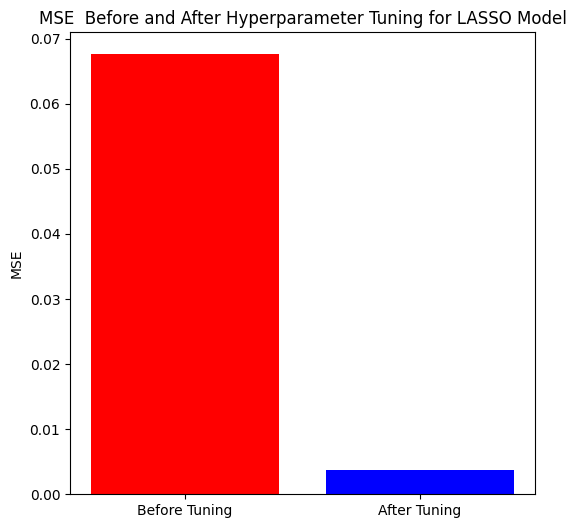

In [70]:
# Creating barplot for Lasso using MSE metrics before and after tuning
plt.figure(figsize=(6, 6))
labels = ['Before Tuning','After Tuning']
mse_values = [mse_before,mse_after]

plt.bar(labels, mse_values, color=['red', 'blue'])
#plt.ylim(0, 1)
plt.ylabel('MSE')
plt.title('MSE  Before and After Hyperparameter Tuning for LASSO Model')
plt.show()

**OBSERVATION:**

Using the selected parameters and then performing hyperparameter tuning. We observe that the mean squared error obtained after performing hyperparameter tuning is 0.003754. From the graph, we can clearly observe that the mean squared error decreased even more after applying hyperparameter tuning. The best hyperparameter observed is that the alpha value is 0.01.

# **Hyperparameter tuning OF KNN Using GridSearch**

Applying the KNN

In [55]:
# Considering the two parameters such as 'n_neighbors', 'weights' to perform hyperparameter tuning with values respectively.
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}

# Initialize KNN regressor
knn_model = KNeighborsRegressor()




In [56]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_knn_selected, Y_train_scaled)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [57]:
# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

In [58]:
# Initialize KNN model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors, weights=best_weights)

# Train the best model on the selected features
best_knn_model.fit(X_train_knn_selected, Y_train_scaled)

KNeighborsRegressor(n_neighbors=7, weights='distance')

In [59]:
# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test_knn_selected)

# Calculate Mean Squared Error
mse_knn_after = mean_squared_error(Y_test_scaled, y_pred_knn)

# Print the best hyperparameters and Mean Squared Error
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Squared Error on Test Set: {mse_knn_after}')

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Mean Squared Error on Test Set: 0.010701562018138043


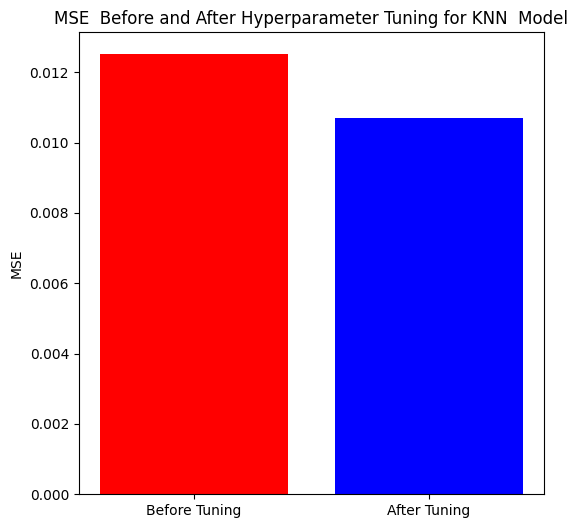

In [69]:
# Creating barplot for KNN using MSE metrics before and after tuning
plt.figure(figsize=(6, 6))
labels = ['Before Tuning','After Tuning']
mse_values = [mse_knn,mse_knn_after]

plt.bar(labels, mse_values, color=['red', 'blue'])
#plt.ylim(0, 1)
plt.ylabel('MSE')
plt.title('MSE  Before and After Hyperparameter Tuning for KNN  Model')
plt.show()

**Observation:**


Using the selected parameters and then performing hyperparameter tuning. We observe that the mean squared error obtained after performing hyperparameter tuning is 0.013413. From the graph, we can clearly observe that the mean squared error decreased after applying hyperparameter tuning. The best hyperparameter observed are {'n_neighbors': 5, 'weights': 'distance'}.

# Best model :


The best model among the three models is the k-Nearest Neighbors (KNN) algorithm for feature variable selection. KNN is particularly suitable for this scenario because it assesses the similarity of data points based on features, making it effective in capturing patterns within the dataset. In the context of bike-sharing, where usage patterns may depend on various factors like weather, time of day, and user demographics, KNN can identify the most influential features by considering their impact on the proximity of instances in the feature space.


The mean squared error obtained for KNN is 0.0172 it is less when compared to lasso and correlation methods. When choosing features that make a substantial contribution to the prediction of bike-sharing behaviors, KNN's capacity to capture intricate linkages and dependencies in the data is favorable. Furthermore, KNN is flexible for a variety of datasets because it is non-parametric and does not presume a particular distribution of the data.

Although Lasso and Correlation are useful methods in some situations, KNN emphasizes the significance of proximity-based associations in comprehending usage patterns and fits in well with the characteristics of bike-sharing data. Because of its versatility and capacity to capture features, KNN is a good option for efficient variable selection in the bike-sharing dataset.


The featured that are obtained using KNN are 'year', 'hour', 'temp', 'atemp', 'humidity', 'casual', 'registered','summer', 'winter', 'jan'.